<a href="https://colab.research.google.com/github/ABMARK43/Data-Mining-Assignments/blob/master/k_medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.spatial import distance
import copy


In [0]:
iris = datasets.load_iris()

In [0]:
points = pd.DataFrame(iris.data[:,(0,1)])

In [0]:
x , y = points[0],points[1]

In [0]:
points = list(zip(x,y))

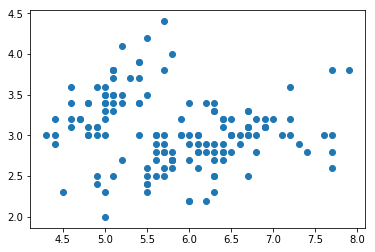

In [0]:
plt.scatter(x,y)

In [0]:
def calculate_distance_matrix(centers,points) :
  dist = []
  for i in range(len(centers)) :
        d = []
        for point in points :
            d.append(distance.euclidean(point,centers[i]))
        dist.append(d)
  return dist

In [0]:
def initial_seeds(k,points):
  seeds =[]
  seeds.append(points[np.random.randint(0,150)])
  for i in range(k-1):
    distances = np.array(calculate_distance_matrix(seeds,points)).T
    z = distances.mean(axis = 1)
    j = np.argmax(z)
    seeds.append(points[j])
  return(seeds)
    

In [0]:
def k_medoids(k,points):
    medoids = initial_seeds(k,points)  # setting up the initial seeds
    print('initial seeds',medoids)
    prev = []
    z = np.array(calculate_distance_matrix(medoids,points)).T   # finding the distance matrix of all points to medoids
    for dist in z:
      prev.append(dist[np.argmin(dist)])       # make a list of minimum of the distances to the medoids
    for j in range(len(medoids)) :             # this for loop will iterate over all medoids
      medoids_new = medoids[:]
      for point in points :         
        medoids_new[j] = point
        if len(set(medoids_new)) < len(medoids_new):  
          medoids_new = medoids[:]
          continue
        z_new = np.array(calculate_distance_matrix(medoids_new,points)).T
        new = []
        for i in z_new :
          new.append(i[np.argmin(i)])
        if np.sum(np.array(new) - np.array(prev)) < 0 :
          temp = []
          medoids = medoids_new[:]
          zx = np.array(calculate_distance_matrix(medoids,points)).T   
          for i in zx:
            temp.append(i[np.argmin(i)])
          prev = temp
    return medoids

In [0]:
def make_cluster(medoids,points):
    cluster = {}
    k = len(medoids)
    for j in range(k):            # creating a dictionary of list for k clusters 
      cluster[j] = [] 
    z = np.array(calculate_distance_matrix(medoids,points)).T    
    for i in range(len(points)) : # assigning points to their respective cluster
        m = np.argmin(z[i])
        cluster[m].append(np.array(points[i]))
    return cluster
  

In [0]:
medoids = k_medoids(5,points)

initial seeds [(7.2, 3.2), (4.3, 3.0), (7.9, 3.8), (4.5, 2.3), (7.7, 2.6)]


In [0]:
clusters = make_cluster(medoids,points)

In [0]:
c1 = pd.DataFrame(clusters[0])
c2 = pd.DataFrame(clusters[1])
c3 = pd.DataFrame(clusters[2])
c4 = pd.DataFrame(clusters[3])
c5 = pd.DataFrame(clusters[4])

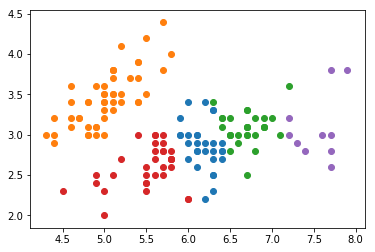

In [0]:
plt.scatter(c1.iloc[:,0],c1.iloc[:,1])
plt.scatter(c2.iloc[:,0],c2.iloc[:,1])
plt.scatter(c3.iloc[:,0],c3.iloc[:,1])
plt.scatter(c4.iloc[:,0],c4.iloc[:,1])
plt.scatter(c5.iloc[:,0],c5.iloc[:,1])